#                              KAGGLE TITANIC PROJECT 

Hey this is my first project and i am open for constructive critcism and your suggestions to improve my score.
By using this piece of code you get an accuracy score of 74.6%

# 1.Importing Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# 2. Importing Data using pandas

In [2]:
df_train=pd.read_csv('D:\\Bharadwaj\\AL MI\\kaggle\\train.csv')

df_test=pd.read_csv('D:\\Bharadwaj\\AL MI\\kaggle\\test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Using Matplotlib for creating graphs

I have used Seaborn and Matplotlib.pyplot for some data visualisation. After plotting I came to Know that LogisticRegression can be used. 

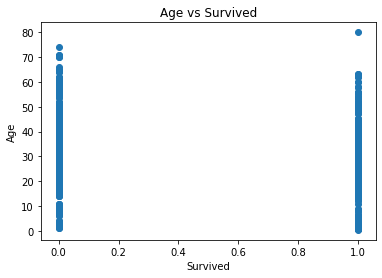

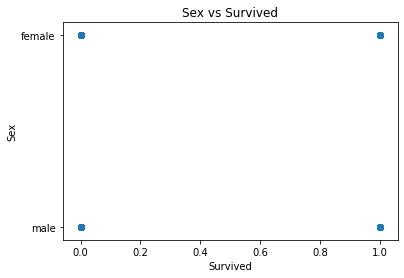

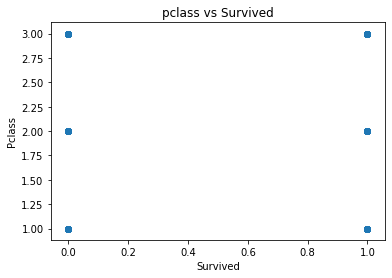

In [3]:
plt.title('Age vs Survived')
plt.scatter(df_train['Survived'],df_train['Age'])
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()
plt.title('Sex vs Survived')
plt.scatter(df_train['Survived'],df_train['Sex'])
plt.xlabel('Survived')
plt.ylabel('Sex')
plt.show()
plt.title('pclass vs Survived')
plt.scatter(df_train['Survived'],df_train['Pclass'])
plt.xlabel('Survived')
plt.ylabel('Pclass')
plt.show()

# 4. Handling Missing Values 

Checking for null values and hadling missing values. 

In [4]:
print(df_train.isnull().sum())
print('\n checking null values for Test dataset \n \n',df_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 checking null values for Test dataset 
 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Filling the NaN values by median

In [5]:
df_train.head()
male_median_age=df_train['Age'].loc[df_train['Sex']=='male'].median()
female_median_age=df_train['Age'].loc[df_train['Sex']=='female'].median()
print('median age for females',female_median_age)
print('median age for males',male_median_age)

median age for females 27.0
median age for males 29.0


In [6]:
#handling missing values 
df_train['Age'].fillna(df_train.groupby('Sex')['Age'].transform('median'),inplace=True)
df_test['Age'].fillna(df_test.groupby('Sex')['Age'].transform('median'),inplace=True)
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Handling the categorical features with the help of encoding. I tried using LabelEncoder and OneHotEncoder but for some reason I couldnt make them run, so I had to use get_dummies function to encode. 

I have also Dropped  features like Cabin,Ticket which can be further used for improving score. 

In [7]:
#train 
sex_dummies=pd.get_dummies(df_train['Sex'],drop_first=True)
df_train=pd.concat([df_train,sex_dummies],axis='columns')
print(df_train)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [8]:
df_train=df_train.drop(['Name','Cabin','Sex','Ticket'],axis=1)
embarked_dummies=pd.get_dummies(df_train['Embarked'],drop_first=True)
print(embarked_dummies)
df_train=pd.concat([df_train,embarked_dummies],axis='columns')
print(df_train)


     Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
886  0  1
887  0  1
888  0  1
889  0  0
890  1  0

[891 rows x 2 columns]
     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare Embarked  \
0              1         0       3  22.0      1      0   7.2500        S   
1              2         1       1  38.0      1      0  71.2833        C   
2              3         1       3  26.0      0      0   7.9250        S   
3              4         1       1  35.0      1      0  53.1000        S   
4              5         0       3  35.0      0      0   8.0500        S   
..           ...       ...     ...   ...    ...    ...      ...      ...   
886          887         0       2  27.0      0      0  13.0000        S   
887          888         1       1  19.0      0      0  30.0000        S   
888          889         0       3  27.0      1      2  23.4500        S   
889          890         1       1  26.0      0      0  30.0000        C   
890          891    

Handling the missing values and categorical values for test dataset. 

In [9]:
sex_dummies_test=pd.get_dummies(df_test['Sex'],drop_first=True)
df_test=pd.concat([df_test,sex_dummies_test],axis='columns')
print(df_test)


     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  \
0      male  34.5      0      0

In [10]:
df_test=df_test.drop(['Name','Cabin','Sex','Ticket'],axis=1)

In [11]:
embarked_dummies_test=pd.get_dummies(df_test['Embarked'],drop_first=True)
print(embarked_dummies_test)
df_test=pd.concat([df_test,embarked_dummies_test],axis='columns')
print(df_test)

     Q  S
0    1  0
1    0  1
2    1  0
3    0  1
4    0  1
..  .. ..
413  0  1
414  0  0
415  0  1
416  0  1
417  0  0

[418 rows x 2 columns]
     PassengerId  Pclass   Age  SibSp  Parch      Fare Embarked  male  Q  S
0            892       3  34.5      0      0    7.8292        Q     1  1  0
1            893       3  47.0      1      0    7.0000        S     0  0  1
2            894       2  62.0      0      0    9.6875        Q     1  1  0
3            895       3  27.0      0      0    8.6625        S     1  0  1
4            896       3  22.0      1      1   12.2875        S     0  0  1
..           ...     ...   ...    ...    ...       ...      ...   ... .. ..
413         1305       3  27.0      0      0    8.0500        S     1  0  1
414         1306       1  39.0      0      0  108.9000        C     0  0  0
415         1307       3  38.5      0      0    7.2500        S     1  0  1
416         1308       3  27.0      0      0    8.0500        S     1  0  1
417         1309    

In [12]:
df_test=df_test.drop(['Embarked'],axis=1)
df_train=df_train.drop(['Embarked'],axis=1)

print(df_test)
print(df_train)

     PassengerId  Pclass   Age  SibSp  Parch      Fare  male  Q  S
0            892       3  34.5      0      0    7.8292     1  1  0
1            893       3  47.0      1      0    7.0000     0  0  1
2            894       2  62.0      0      0    9.6875     1  1  0
3            895       3  27.0      0      0    8.6625     1  0  1
4            896       3  22.0      1      1   12.2875     0  0  1
..           ...     ...   ...    ...    ...       ...   ... .. ..
413         1305       3  27.0      0      0    8.0500     1  0  1
414         1306       1  39.0      0      0  108.9000     0  0  0
415         1307       3  38.5      0      0    7.2500     1  0  1
416         1308       3  27.0      0      0    8.0500     1  0  1
417         1309       3  27.0      1      1   22.3583     1  0  0

[418 rows x 9 columns]
     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0              1         0       3  22.0      1      0   7.2500     1  0  1
1              2    

# 5.Splitting The Data  

In [13]:
X_train=df_train.loc[:,df_train.columns!='Survived']
print(X_train)
y_train=df_train.loc[:,['Survived']]
print(y_train)
X_test=df_test.iloc[:,:]
print(X_test)

     PassengerId  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0              1       3  22.0      1      0   7.2500     1  0  1
1              2       1  38.0      1      0  71.2833     0  0  0
2              3       3  26.0      0      0   7.9250     0  0  1
3              4       1  35.0      1      0  53.1000     0  0  1
4              5       3  35.0      0      0   8.0500     1  0  1
..           ...     ...   ...    ...    ...      ...   ... .. ..
886          887       2  27.0      0      0  13.0000     1  0  1
887          888       1  19.0      0      0  30.0000     0  0  1
888          889       3  27.0      1      2  23.4500     0  0  1
889          890       1  26.0      0      0  30.0000     1  0  0
890          891       3  32.0      0      0   7.7500     1  1  0

[891 rows x 9 columns]
     Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 c

# 6. Machine Learning Algorithms

I Have used Losgistic regression in model, I have used Adaboosting with logistic regression as a weak learner in model2,Random forest classifier as model3, Adaboosting with random forest as a weak learner in model4. 
I have used train_test_split to split the train the data into two parts so that I can calculate the accuracy of my model with the training data. 

In [14]:
from sklearn.model_selection import train_test_split

X_train1,X_test1,y_train1,y_test1=train_test_split(X_train,y_train,random_state=0,)

In [15]:


model=LogisticRegression()
model.fit(X_train1,y_train1)


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_pred=model.predict(X_test1)

In [17]:
print(accuracy_score(y_test1,y_pred))

0.7847533632286996


In [18]:
model2=AdaBoostClassifier(base_estimator=model)
model2.fit(X_train1,y_train1)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence th

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='warn', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=50, random_state=None)

In [19]:
y_pred2=model.predict(X_test1)

In [20]:
print(accuracy_score(y_test1,y_pred2))

0.7847533632286996


In [21]:
model3=RandomForestClassifier()

In [22]:
model3.fit(X_train1,y_train1)


D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
y_pred3=model3.predict(X_test1)

In [24]:
print(accuracy_score(y_test1,y_pred3))

0.8071748878923767


In [25]:
model4=AdaBoostClassifier(base_estimator=model3)
model4.fit(X_train1,y_train1)
y_pred4=model4.predict(X_test1)
print(accuracy_score(y_test1,y_pred4))

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.820627802690583


# 7.Submission 

Checking for missing values in the dataset and fixing with fillna. I have used RandomForestclassifier for submission. Adaboosting with random forest as a base learner had a very fluctuating score, As far as I know boosting is kinda good but I couldn't make any sense of it. 

In [26]:

print(X_test.isnull().sum())

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           1
male           0
Q              0
S              0
dtype: int64


In [27]:
fare_median=X_test['Fare'].median()
df_test['Fare'].fillna(fare_median,inplace=True)
print(X_test.isnull().sum())

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64


In [28]:
model3.fit(X_train,y_train)
y_pred_submission=model3.predict(X_test)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [29]:
submission=pd.DataFrame({'PassengerId': X_test['PassengerId'],'Survived':y_pred_submission})
print(submission.head())
submission.to_csv('submission.csv')


   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


# 8. Improvement 

With a bit of tweaking one can improve the scores. 
Feature Engineering on Ticket, cabin can be used also better ML algo probably boosting......


THANKS 

